<a href="https://colab.research.google.com/github/kylaDms/Kyla/blob/main/jihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Import Dataset

In [ ]:
data_path = "/content/drive/MyDrive/KULIAH/SMT5/Datmin/UAS/dataset"
print(os.listdir(data_path))

In [ ]:
train_data      = data_path

anger_data     = train_data + '/anger/'
fear_data     = train_data + '/fear/'
happiness_data = train_data + '/happiness/'
sadness_data   = train_data + '/sadness/'
disgust_data   = train_data + "/disgust/"

In [ ]:
print("anger files:", len(os.listdir(anger_data)))
print("fear files:", len(os.listdir(fear_data)))
print("happiness files", len(os.listdir(happiness_data)))
print("sadness files:", len(os.listdir(sadness_data)))
print("disgust files:", len(os.listdir(disgust_data)))

print('TOTAL TRAIN SOUNDS:', len(os.listdir(anger_data))
                              + len(os.listdir(fear_data))
                              + len(os.listdir(happiness_data))
                              + len(os.listdir(sadness_data))
                              + len(os.listdir(disgust_data)))

# EDA and Visualization

In [ ]:
x = np.array([len(os.listdir(anger_data)),
              len(os.listdir(fear_data)),
              len(os.listdir(happiness_data)),
              len(os.listdir(sadness_data)),
              len(os.listdir(disgust_data))])
labels = ['anger', 'fear', 'happiness', 'sadness', 'disgust']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

## Visualizing random sample

In [ ]:
def visulize_random_sample(folder_name):
  #to hear the audio sample
  random_sample             = np.random.randint(0,len(os.listdir(folder_name)))
  sample_sound              = os.listdir(folder_name)[random_sample]
  sample_address            = folder_name + sample_sound
  sample_sound, sample_rate = librosa.load(sample_address)
  sample_audio              = ipd.Audio(sample_sound, rate=sample_rate)
  return sample_audio

In [ ]:
visulize_random_sample(anger_data)

## *1. Anger sound*

In [ ]:
# Choose random sound from anger folder
random_anger= np.random.randint(0,len(os.listdir(anger_data)))
anger_sound = os.listdir(anger_data)[random_anger]
anger_sound_address = anger_data+anger_sound
anger_sound_sample,sample_rate = librosa.load(anger_sound_address)
ipd.Audio(anger_sound_sample,rate=sample_rate)

### Waveform

In [ ]:
#librosa.display.waveshow(data, sr=sampling_rate)

plt.figure(figsize=(20,5))
librosa.display.waveshow(anger_sound_sample, sr = sample_rate)
plt.title("anger Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

In [ ]:
fft_anger = np.fft.fft(anger_sound_sample)
magnitude_anger = np.abs(fft_anger)
freq_anger = np.linspace(0,sample_rate, len(magnitude_anger))
half_freq = freq_anger[:int(len(freq_anger)/2)]
half_magnitude = magnitude_anger[:int(len(freq_anger)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

In [ ]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_anger = librosa.stft(anger_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram = np.abs(stft_anger)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

### MFCCs

In [ ]:
MFCCs = librosa.feature.mfcc(y=anger_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15, 10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

## *2. Fear sound*

In [ ]:
random_fear= np.random.randint(0,len(os.listdir(fear_data)))
fear_sound = os.listdir(fear_data)[random_fear]
fear_sound_address = fear_data+fear_sound
fear_sound_sample,sample_rate = librosa.load(fear_sound_address)
ipd.Audio(fear_sound_sample,rate=sample_rate)

### Waveform

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(fear_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

In [ ]:
fft_fear = np.fft.fft(fear_sound_sample)
magnitude_fear = np.abs(fft_fear)
freq_fear = np.linspace(0,sample_rate, len(magnitude_fear))
half_freq = freq_fear[:int(len(freq_fear)/2)]
half_magnitude = magnitude_fear[:int(len(freq_fear)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

In [ ]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_fear = librosa.stft(fear_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_fear = np.abs(stft_fear)
log_spectrogram_fear = librosa.amplitude_to_db(spectrogram_fear)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("Spectrogram_fear")

### MFCCs

In [ ]:
MFCCs_fear = librosa.feature.mfcc(y=fear_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# Display the MFCCs
plt.figure(figsize=(15,10))
# Use MFCCs_fear instead of MFCCs for display
librosa.display.specshow(MFCCs_fear, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("MFCCs_fear")  # Changed title to reflect the displayed variable
plt.show()

In [ ]:
MFCCs = librosa.feature.mfcc(y=anger_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15, 10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

## *3. Happiness sound*

In [ ]:
random_happiness= np.random.randint(0,len(os.listdir(happiness_data)))
happiness_sound = os.listdir(happiness_data)[random_happiness]
happiness_sound_address = happiness_data+happiness_sound
happiness_sound_sample,sample_rate = librosa.load(happiness_sound_address)
ipd.Audio(happiness_sound_sample,rate=sample_rate)

### Waveform

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(happiness_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

In [ ]:
fft_happiness = np.fft.fft(happiness_sound_sample)
magnitude_happiness = np.abs(fft_happiness)
freq_happiness = np.linspace(0,sample_rate, len(magnitude_happiness))
half_freq = freq_happiness[:int(len(freq_happiness)/2)]
half_magnitude = magnitude_happiness[:int(len(freq_happiness)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

In [ ]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_happiness = librosa.stft(happiness_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_happiness = np.abs(stft_happiness)
log_spectrogram_happiness = librosa.amplitude_to_db(spectrogram_happiness)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("Spectrogram_happiness")

### MFCCs

In [ ]:
MFCCs_happiness = librosa.feature.mfcc(y=happiness_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
# Ensure you are displaying the correct variable (MFCCs_happiness, not MFCCs)
librosa.display.specshow(MFCCs_happiness, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("MFCCs_happiness")
plt.show()

## *4. Sadness sound*

In [ ]:
random_sadness= np.random.randint(0,len(os.listdir(sadness_data)))
sadness_sound = os.listdir(sadness_data)[random_sadness]
sadness_sound_address = sadness_data+sadness_sound
sadness_sound_sample,sample_rate = librosa.load(sadness_sound_address)
ipd.Audio(sadness_sound_sample,rate=sample_rate)

### Waveform

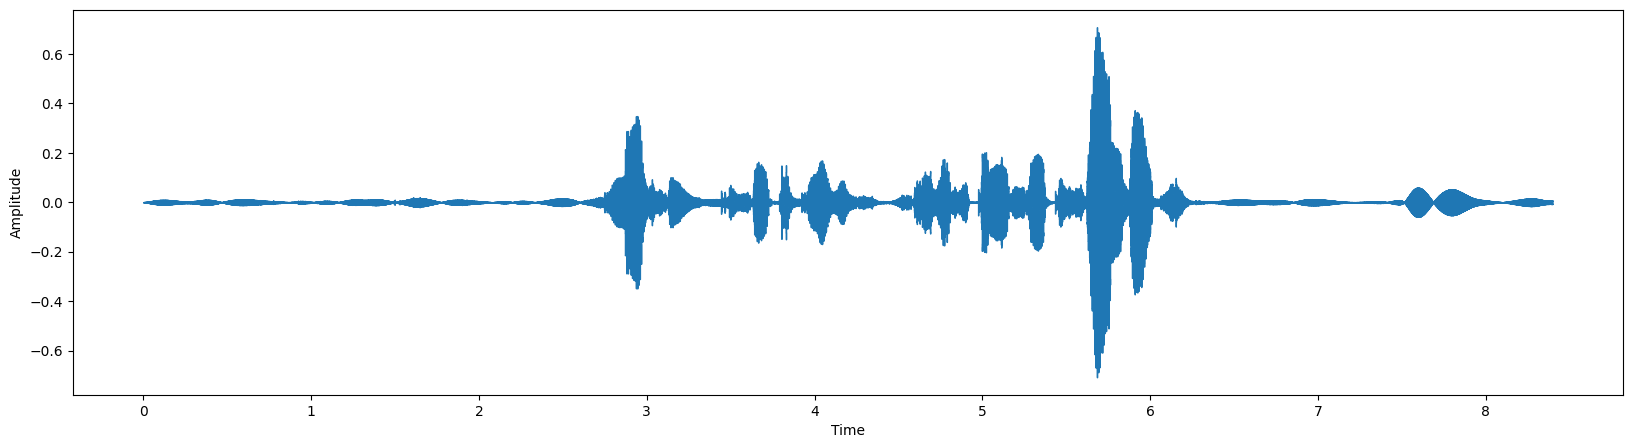

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(sadness_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

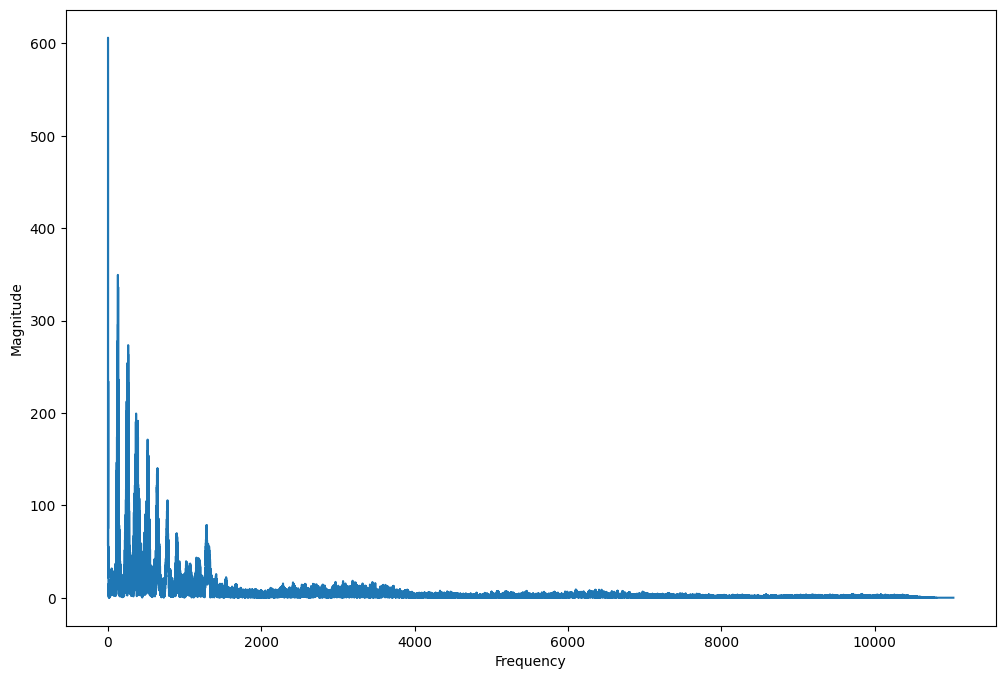

In [ ]:
fft_sadness = np.fft.fft(sadness_sound_sample)
magnitude_sadness = np.abs(fft_sadness)
freq_sadness = np.linspace(0,sample_rate, len(magnitude_sadness))
half_freq = freq_sadness[:int(len(freq_sadness)/2)]
half_magnitude = magnitude_sadness[:int(len(freq_sadness)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_sadness')

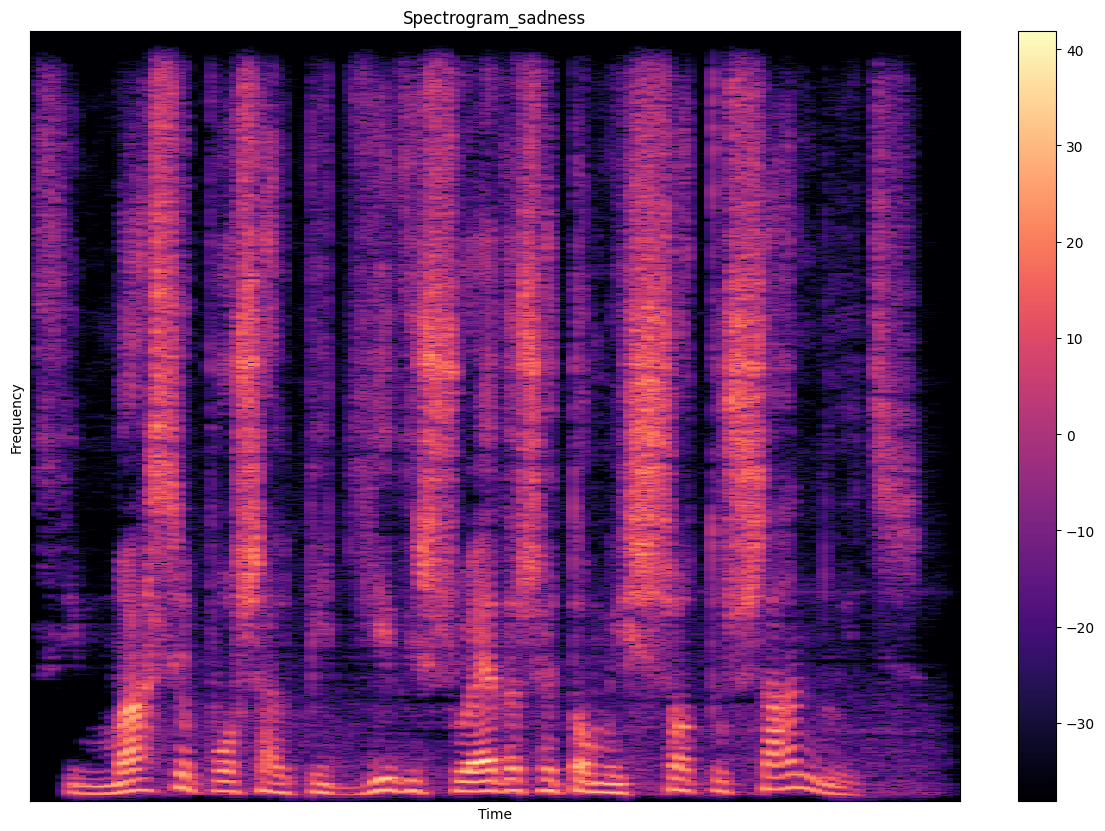

In [ ]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_sadness = librosa.stft(sadness_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_sadness = np.abs(stft_sadness)
log_spectrogram_sadness = librosa.amplitude_to_db(spectrogram_sadness)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("magma")
plt.title("Spectrogram_sadness")

### MFCCs

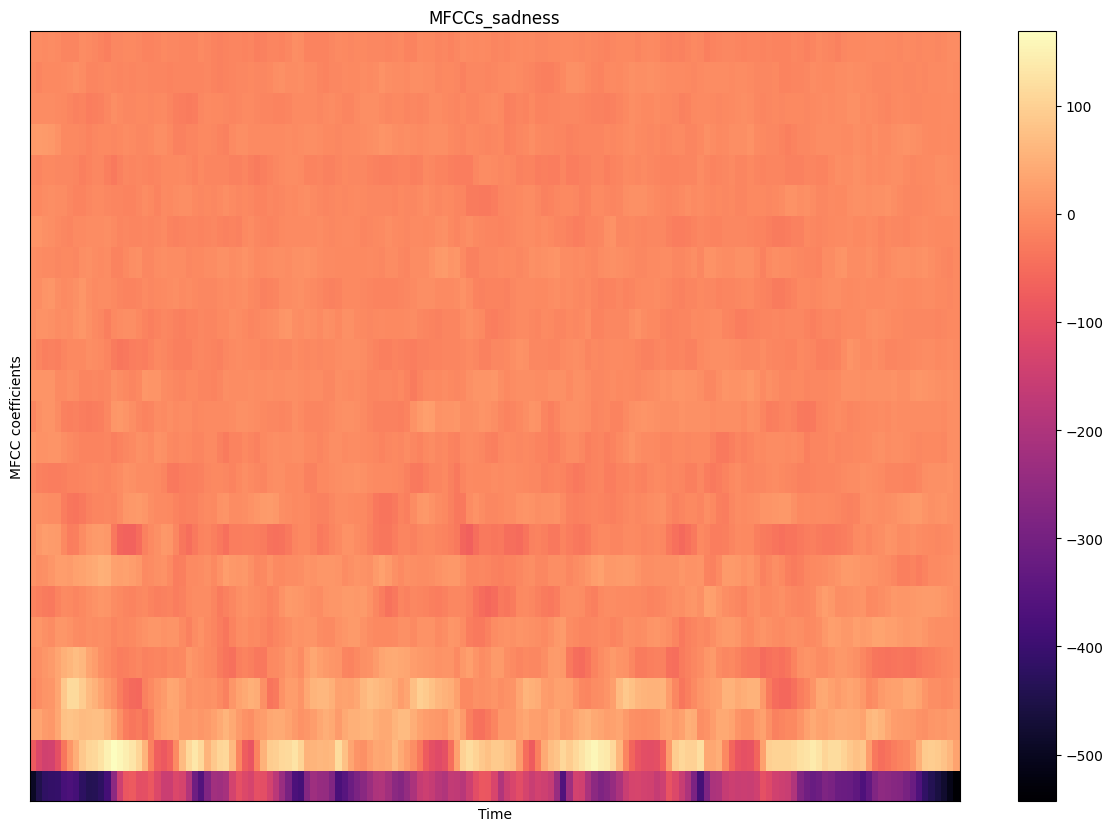

In [ ]:
MFCCs_sadness = librosa.feature.mfcc(y=sadness_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("magma")
plt.title("MFCCs_sadness")
plt.show()

## *5. Disgust sound*

In [ ]:
random_disgust= np.random.randint(0,len(os.listdir(disgust_data)))
disgust_sound = os.listdir(disgust_data)[random_disgust]
disgust_sound_address = disgust_data+disgust_sound
disgust_sound_sample,sample_rate = librosa.load(disgust_sound_address)
ipd.Audio(disgust_sound_sample,rate=sample_rate)

### Waveform

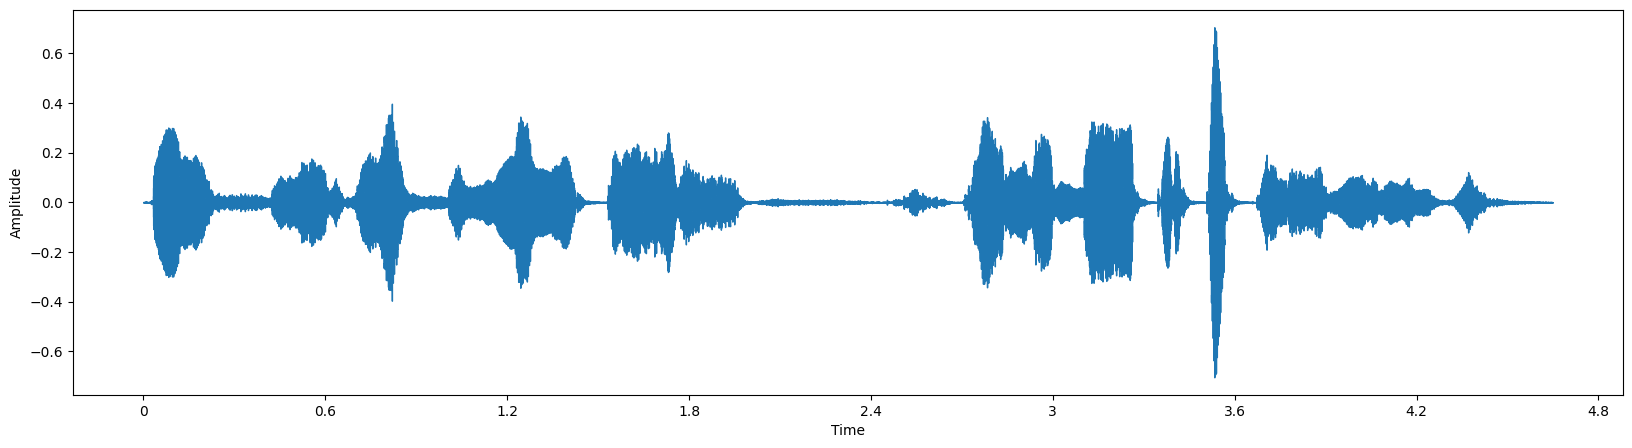

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(disgust_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

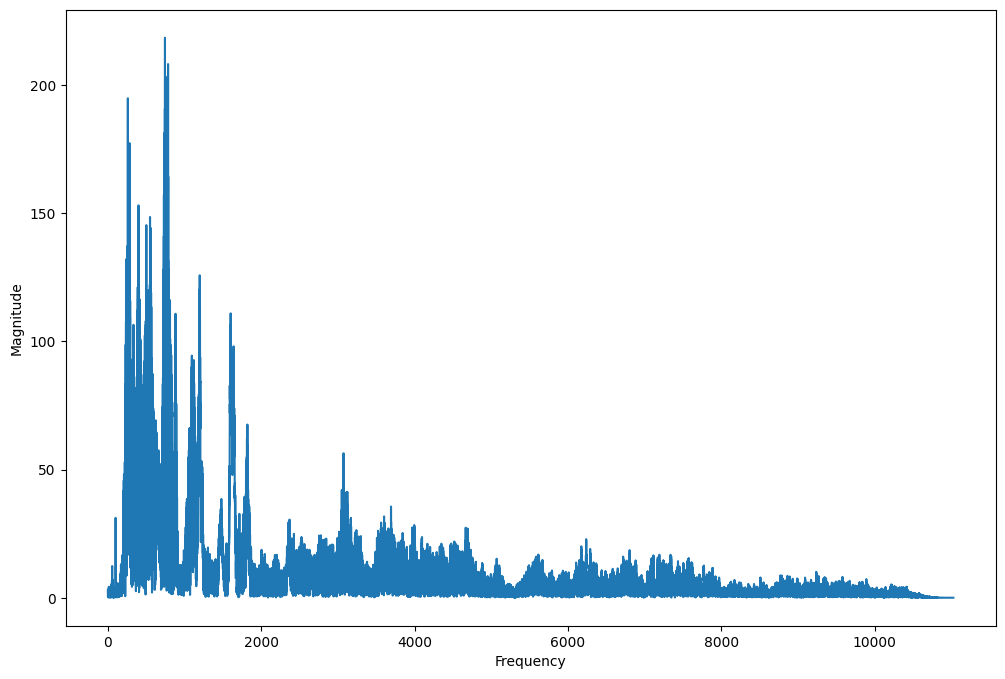

In [ ]:
fft_disgust = np.fft.fft(disgust_sound_sample)
magnitude_disgust = np.abs(fft_disgust)
freq_disgust = np.linspace(0,sample_rate, len(magnitude_disgust))
half_freq = freq_disgust[:int(len(freq_disgust)/2)]
half_magnitude = magnitude_disgust[:int(len(freq_disgust)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

In [ ]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_disgust = librosa.stft(disgust_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_disgust = np.abs(stft_disgust)
log_spectrogram_disgust = librosa.amplitude_to_db(spectrogram_disgust)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("Spectrogram_disguste")

### MFCCs

In [ ]:
MFCCs_disgust = librosa.feature.mfcc(y=disgust_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("MFCCs_disgust")
plt.show()

# Loading Data

In [ ]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration)
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)
            # extract angerized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)
        except Exception as e:
            print("Error encountered while parsing file: ", file)
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

# Preprocessing

In [ ]:
# Constants
SAMPLE_RATE = 22050
MAX_SOUND_CLIP_DURATION = 10
CLASSES = ['anger', 'fear', 'happiness', 'sadness', 'disgust']
NB_CLASSES = len(CLASSES)

In [ ]:
# Label Encoding
label_to_int = {k: v for v, k in enumerate(CLASSES)}
int_to_label = {v: k for k, v in label_to_int.items()}
print("Label Encoding:", label_to_int)

In [ ]:
# Function to load data
def load_file_data(folder, file_names, duration=10, sr=22050):
    input_length = sr * duration
    data = []
    labels = []
    for file_name in file_names:
        try:
            sound_file = os.path.join(folder, file_name)
            print("Loading file:", sound_file)
            X, sr = librosa.load(sound_file, sr=sr, duration=duration)
            dur = librosa.get_duration(y=X, sr=sr)
            if round(dur) < duration:
                print("Fixing audio length:", file_name)
                X = librosa.util.fix_length(X, size=input_length)
            # Extract features
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T, axis=0)
            data.append(mfccs)
        except Exception as e:
            print("Error encountered while parsing file:", file_name, e)
    return np.array(data)

In [ ]:
# Load datasets
train_data      = data_path

anger_data     = train_data + '/anger/'
fear_data     = train_data + '/fear/'
happiness_data = train_data + '/happiness/'
sadness_data   = train_data + '/sadness/'
disgust_data   = train_data + "/disgust/"

anger_files = fnmatch.filter(os.listdir(anger_data), '*.wav')
fear_files = fnmatch.filter(os.listdir(fear_data), '*.wav')
happiness_files = fnmatch.filter(os.listdir(happiness_data), '*.wav')
sadness_files = fnmatch.filter(os.listdir(sadness_data), '*.wav')
disgust_files = fnmatch.filter(os.listdir(disgust_data), '*.wav')

anger_sounds = load_file_data(anger_data, anger_files)
fear_sounds = load_file_data(fear_data, fear_files)
happiness_sounds = load_file_data(happiness_data, happiness_files)
sadness_sounds = load_file_data(sadness_data, sadness_files)
disgust_sounds = load_file_data(disgust_data, disgust_files)

# Assign labels
anger_labels = [label_to_int['anger']] * len(anger_sounds)
fear_labels = [label_to_int['fear']] * len(fear_sounds)
happiness_labels = [label_to_int['happiness']] * len(happiness_sounds)
sadness_labels = [label_to_int['sadness']] * len(sadness_sounds)
disgust_labels = [label_to_int['disgust']] * len(disgust_sounds)

# Combine data and labels
x_data = np.concatenate([anger_sounds, fear_sounds, happiness_sounds, sadness_sounds, disgust_sounds], axis=0)
y_data = np.array(anger_labels + fear_labels + happiness_labels + sadness_labels + disgust_labels)

In [ ]:
import os
import numpy as np
import librosa
import fnmatch
import matplotlib.pyplot as plt
import seaborn as sns

# Keras and TensorFlow imports
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Constants
SAMPLE_RATE = 22050
MAX_SOUND_CLIP_DURATION = 10
CLASSES = ['anger', 'fear', 'happiness', 'sadness', 'disgust']
NB_CLASSES = len(CLASSES)

def load_and_preprocess_data(data_path):
    """
    Load audio data, extract MFCC features, and perform data augmentation
    """
    X = []
    y = []

    for idx, cls in enumerate(CLASSES):
        class_path = os.path.join(data_path, cls)
        class_files = fnmatch.filter(os.listdir(class_path), '*.wav')

        for file_name in class_files:
            file_path = os.path.join(class_path, file_name)

            try:
                # Load audio file
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=MAX_SOUND_CLIP_DURATION)

                # Ensure consistent length
                if len(signal) < SAMPLE_RATE * MAX_SOUND_CLIP_DURATION:
                    signal = librosa.util.fix_length(signal, size=SAMPLE_RATE * MAX_SOUND_CLIP_DURATION)

                # Extract MFCC features
                mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
                mfccs_mean = np.mean(mfccs.T, axis=0)
                X.append(mfccs_mean)
                y.append(idx)

                # Data Augmentation
                augmentations = [
                    lambda x: x + 0.02 * np.random.randn(len(x)),  # Noise
                    lambda x: np.roll(x, np.random.randint(-int(0.1 * sr), int(0.1 * sr))),  # Time-shift
                    lambda x: librosa.effects.percussive(x),  # Percussion effect
                    lambda x: x * np.random.uniform(0.8, 1.2)  # Gain adjustment
                ]

                for aug_func in augmentations:
                    aug_signal = aug_func(signal)
                    mfccs_aug = librosa.feature.mfcc(y=aug_signal, sr=sr, n_mfcc=13)
                    mfccs_aug_mean = np.mean(mfccs_aug.T, axis=0)
                    X.append(mfccs_aug_mean)
                    y.append(idx)

            except Exception as e:
                print(f"Error processing {file_name}: {e}")

    return np.array(X), np.array(y)

In [ ]:
def create_emotion_model(input_shape, num_classes):
    """
    Create a simple dense neural network for emotion classification
    """
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
def train_emotion_model(X, y, model_path='emotion_model.keras'):
    """
    Train emotion recognition model and save it
    """
    # Preprocessing
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y_categorical = to_categorical(y, num_classes=NB_CLASSES)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_categorical, test_size=0.2, stratify=y_categorical, random_state=42)

    # Model creation
    model = create_emotion_model(X_train.shape[1], NB_CLASSES)

    # Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(model_path, save_best_only=True)

    # Training
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stop, model_checkpoint],
        verbose=1
    )

    # Evaluation
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy}")

    # Confusion Matrix
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return model

In [ ]:
def predict_emotion(model, audio_path):
    """
    Predict emotion from a single audio file
    """
    # Load and preprocess audio
    signal, sr = librosa.load(audio_path, sr=SAMPLE_RATE, duration=MAX_SOUND_CLIP_DURATION)

    if len(signal) < SAMPLE_RATE * MAX_SOUND_CLIP_DURATION:
        signal = librosa.util.fix_length(signal, size=SAMPLE_RATE * MAX_SOUND_CLIP_DURATION)

    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)

    # Scale features
    scaler = StandardScaler()
    mfccs_scaled = scaler.fit_transform(mfccs_mean.reshape(1, -1))

    # Predict
    predictions = model.predict(mfccs_scaled)[0]
    predicted_class = np.argmax(predictions)
    confidence = predictions[predicted_class]

    print(f"Predicted Emotion: {CLASSES[predicted_class]}")
    print(f"Confidence: {confidence*100:.2f}%")

    return CLASSES[predicted_class], confidence

<ipython-input-50-aaa2704f6160>:23: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=MAX_SOUND_CLIP_DURATION)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing s05 (3).wav: 
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2432 - loss: 2.0190 - val_accuracy: 0.3967 - val_loss: 1.4598
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3732 - loss: 1.5329 - val_accuracy: 0.4773 - val_loss: 1.3287
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4375 - loss: 1.3957 - val_accuracy: 0.4938 - val_loss: 1.2241
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4579 - loss: 1.3375 - val_accuracy: 0.5517 - val_loss: 1.1381
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4883 - loss: 1.2427 - val_accuracy: 0.5558 - val_loss: 1.0684
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4844 - loss: 1.2392 - val_accuracy: 0.5909 - val_loss: 1.0208
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4926 - loss: 1.2193 - val_accuracy: 0.6260 - val_loss: 0.9793
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4994 - loss: 1.1836 - val_accuracy: 0.6240 - val_loss: 0.

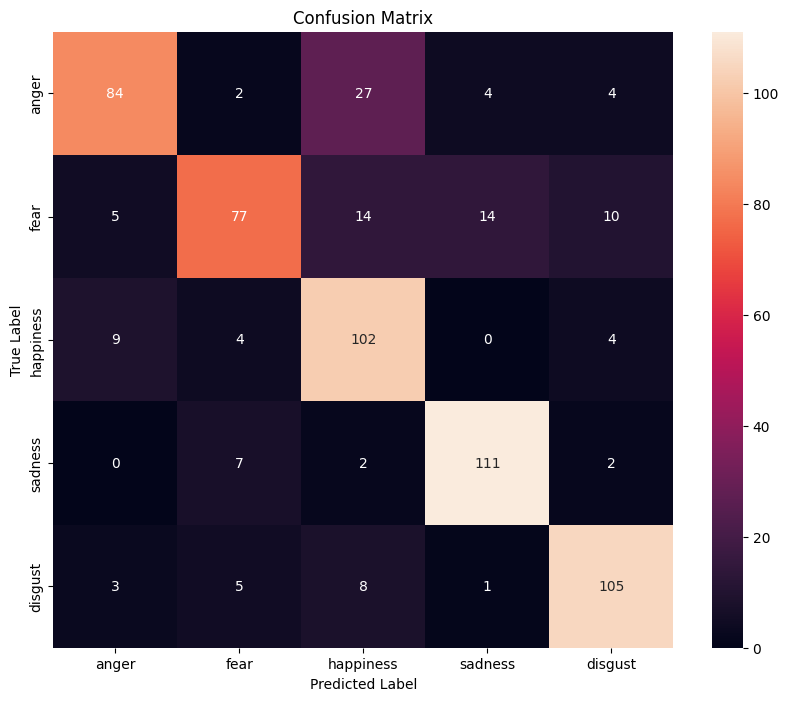

In [ ]:
# Main Execution
if __name__ == "__main__":
    # Replace with your actual data path
    DATA_PATH = '/content/drive/MyDrive/KULIAH/SMT5/Datmin/UAS/dataset'

    # Load and preprocess data
    X, y = load_and_preprocess_data(DATA_PATH)

    # Train and save model
    trained_model = train_emotion_model(X, y)

<ipython-input-50-aaa2704f6160>:23: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=MAX_SOUND_CLIP_DURATION)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing s05 (3).wav: 
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2784 - loss: 1.8460 - val_accuracy: 0.3953 - val_loss: 1.4675
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3807 - loss: 1.5255 - val_accuracy: 0.4289 - val_loss: 1.3838
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4169 - loss: 1.4375 - val_accuracy: 0.4677 - val_loss: 1.2995
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4373 - loss: 1.3403 - val_accuracy: 0.4961 - val_loss: 1.2286
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4872 - loss: 1.2813 - val_accuracy: 0.5271 - val_loss: 1.1795
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4952 - loss: 1.2232 - val_accuracy: 0.5271 - val_loss: 1.1343
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5064 - loss: 1.2426 - val_accuracy: 0.5581 - val_loss: 1.0983
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4976 - loss: 1.2063 - val_accuracy: 0.5556 - val_loss: 1.0

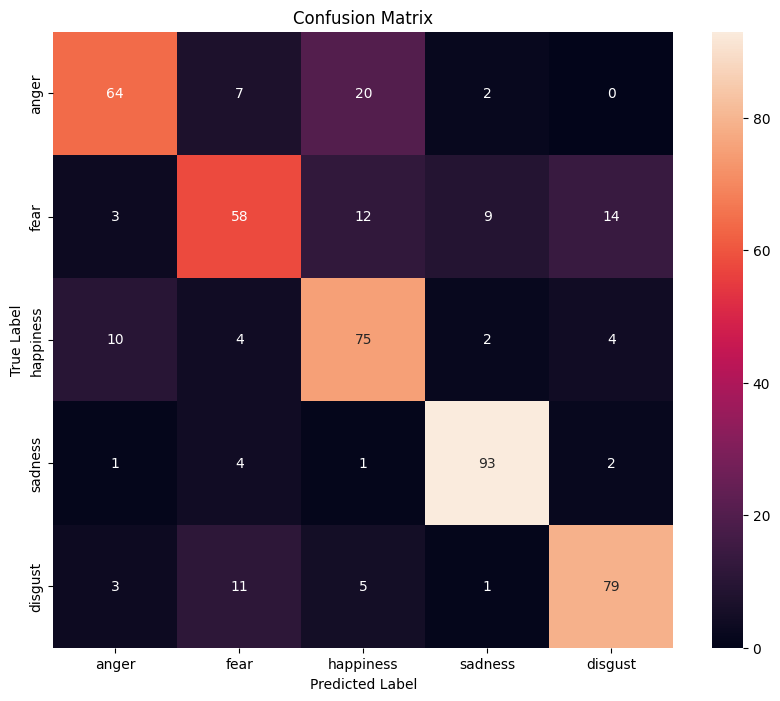

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
# Main Execution
if __name__ == "__main__":
    # Replace with your actual data path
    DATA_PATH = '/content/drive/MyDrive/KULIAH/SMT5/Datmin/UAS/dataset'

    # Load and preprocess data
    X, y = load_and_preprocess_data(DATA_PATH)

    # Train and save model
    # Add this line to get X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    trained_model = train_emotion_model(X_train, y_train)  # Pass X_train and y_train here

    #Get predictions from the trained model for classification report.
    # Assuming 'X_test', 'y_test' are accessible here, or are part of the data preprocessing pipeline.
    # If not, you will need to retrieve them from where they are created or stored

    #Prediction
    y_pred = trained_model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Assuming 'CLASSES' is defined somewhere in the project. if not, you need to define it.
    from sklearn.metrics import classification_report
    print(classification_report(y_true_classes, y_pred_classes, target_names=CLASSES))

<ipython-input-50-aaa2704f6160>:23: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=MAX_SOUND_CLIP_DURATION)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing s05 (3).wav: 
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2533 - loss: 2.0592 - val_accuracy: 0.4793 - val_loss: 1.4264
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3913 - loss: 1.5392 - val_accuracy: 0.5351 - val_loss: 1.2946
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4530 - loss: 1.3592 - val_accuracy: 0.5806 - val_loss: 1.1768
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4577 - loss: 1.3068 - val_accuracy: 0.6157 - val_loss: 1.0853
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4836 - loss: 1.2673 - val_accuracy: 0.6467 - val_loss: 1.0182
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4928 - loss: 1.2532 - val_accuracy: 0.6612 - val_loss: 0.9663
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5272 - loss: 1.2166 - val_accuracy: 0.6612 - val_loss: 0.9303
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5316 - loss: 1.1614 - val_accuracy: 0.6591 - val_loss: 0.9

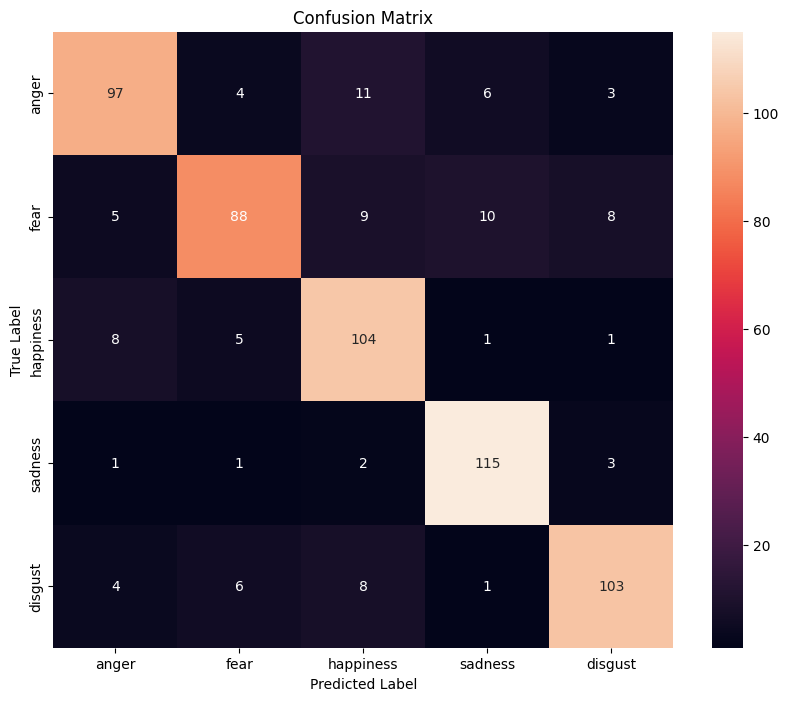

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
DATA_PATH = '/content/drive/MyDrive/KULIAH/SMT5/Datmin/UAS/dataset'

# Load and preprocess data
X, y = load_and_preprocess_data(DATA_PATH)

# Train and save model
# Preprocessing is already done inside train_emotion_model, so we don't need to split here
trained_model = train_emotion_model(X, y)

# Prediction
y_pred = trained_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# y_test should already be one-hot encoded within train_emotion_model
y_true_classes = np.argmax(y_test, axis=1)

# Assuming 'CLASSES' is defined somewhere in the project. if not, you need to define it.
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes, target_names=CLASSES))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1834 - loss: 2.5333 - val_accuracy: 0.3023 - val_loss: 1.5352
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3023 - loss: 1.7755 - val_accuracy: 0.4367 - val_loss: 1.4089
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3758 - loss: 1.5499 - val_accuracy: 0.4780 - val_loss: 1.3190
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4406 - loss: 1.3879 - val_accuracy: 0.5090 - val_loss: 1.2409
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4743 - loss: 1.2983 - val_accuracy: 0.5375 - val_loss: 1.1701
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5020 - loss: 1.2606 - val_accuracy: 0.5478 - val_loss: 1.1112
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4951 - loss: 1.2604 - val_accuracy: 0.5814 - val_loss: 1.0586
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4963 - loss: 1.2068 - val_accuracy: 0.6150 - val_loss: 1.

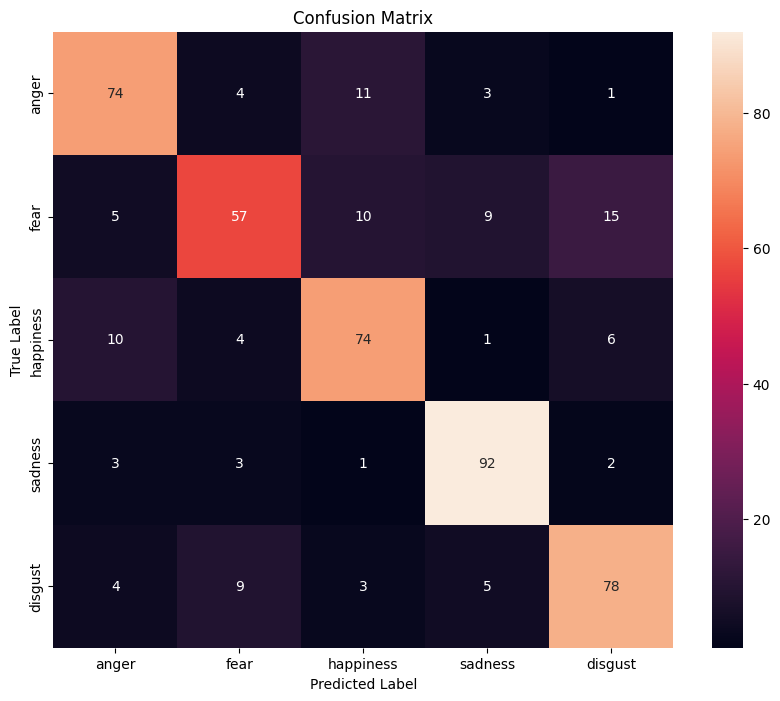

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       142
        fear       0.00      0.00      0.00       119
   happiness       0.00      0.00      0.00       119
     sadness       0.18      1.00      0.31       109
     disgust       0.00      0.00      0.00       115

    accuracy                           0.18       604
   macro avg       0.04      0.20      0.06       604
weighted avg       0.03      0.18      0.06       604



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train and save model
  # Add this line to get X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
trained_model = train_emotion_model(X_train, y_train)  # Pass X_train and y_train here

    #Get predictions from the trained model for classification report.
    # Assuming 'X_test', 'y_test' are accessible here, or are part of the data preprocessing pipeline.
    # If not, you will need to retrieve them from where they are created or stored

    #Prediction
y_pred = trained_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test

    # Assuming 'CLASSES' is defined somewhere in the project. if not, you need to define it.
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes, target_names=CLASSES))

In [ ]:
import pandas as pd

song_data = pd.read_csv('/content/drive/MyDrive/KULIAH/SMT5/Datmin/UAS/data_moods.csv')

In [ ]:
emotion_to_song_features = {
    'happiness': {'tempo': (120, 200), 'valence': (0.7, 1.0), 'energy': (0.7, 1.0)},
    'sadness': {'tempo': (40, 100), 'valence': (0.0, 0.4), 'acousticness': (0.5, 1.0)},
    'anger': {'tempo': (120, 200), 'energy': (0.8, 1.0), 'loudness': (-6, 0)},
    'fear': {'valence': (0.0, 0.3), 'liveness': (0.4, 1.0)},
    'disgust': {'instrumentalness': (0.5, 1.0), 'valence': (0.0, 0.4)}
}

In [ ]:
def recommend_songs(emotion, song_data, n=5):
    # Ambil kriteria fitur untuk emosi yang terdeteksi
    features = emotion_to_song_features[emotion]
    query = pd.Series([True] * len(song_data))

    # Terapkan filter untuk setiap fitur
    for feature, (min_val, max_val) in features.items():
        query &= (song_data[feature] >= min_val) & (song_data[feature] <= max_val)

    # Pilih beberapa lagu dari hasil filter
    recommended_songs = song_data[query].sample(n=min(n, len(song_data[query])))
    return recommended_songs[['name', 'artist', 'album', 'mood']]

In [ ]:
# Misal hasil prediksi emosi adalah 'happiness'
predicted_emotion = 'happiness'

# Dapatkan rekomendasi lagu
recommendations = recommend_songs(predicted_emotion, song_data)

# Tampilkan hasil
print("Predicted Emotion:", predicted_emotion)
print("Song Recommendations:")
recommendations

Predicted Emotion: happiness
Song Recommendations:


,name,artist,album,mood
93,Clap Your Hands,Sia,Clap Your Hands,Happy
281,Just Can't Get Enough - Live in Hammersmith,Depeche Mode,Love In Itself.2 and Live Tracks,Happy
446,Renegades Of Funk,Rage Against The Machine,Renegades,Energetic
568,There For You,Gorgon City,There For You,Energetic
293,Kiss On My List - Remastered,Daryl Hall & John Oates,Hall & Oates,Happy


In [ ]:
# Misal hasil prediksi emosi adalah 'happiness'
predicted_emotion = 'sadness'

# Dapatkan rekomendasi lagu
recommendations = recommend_songs(predicted_emotion, song_data)

# Tampilkan hasil
print("Predicted Emotion:", predicted_emotion)
print("Song Recommendations:")
recommendations

Predicted Emotion: sadness
Song Recommendations:


,name,artist,album,mood
101,Colgando,Barulinho,Siesta,Calm
185,Feels Like We're Dying,Johnny Goth,Far Away,Sad
636,While the Rest of the World Sleeps,Josh Kramer,While the Rest of the World Sleeps,Calm
418,Pierre,Hicham Chahidi,Virgule,Calm
566,The Times Are Tired,Alaskan Tapes,Views from Sixteen Stories,Calm


In [ ]:
# Misal hasil prediksi emosi adalah 'happiness'
predicted_emotion = 'anger'

# Dapatkan rekomendasi lagu
recommendations = recommend_songs(predicted_emotion, song_data)

# Tampilkan hasil
print("Predicted Emotion:", predicted_emotion)
print("Song Recommendations:")
recommendations

Predicted Emotion: anger
Song Recommendations:


,name,artist,album,mood
172,Every Way,Antonio Giacca,Every Way,Energetic
182,Fascination,Alphabeat,This Is Alphabeat,Happy
335,Mad About You,Hooverphonic,The Magnificent Tree,Happy
404,Over My Head (Better Off Dead),Sum 41,Does This Look Infected?,Energetic
71,Blow,Yves V,Blow,Happy


In [ ]:
# Misal hasil prediksi emosi adalah 'happiness'
predicted_emotion = 'fear'

# Dapatkan rekomendasi lagu
recommendations = recommend_songs(predicted_emotion, song_data)

# Tampilkan hasil
print("Predicted Emotion:", predicted_emotion)
print("Song Recommendations:")
recommendations

Predicted Emotion: fear
Song Recommendations:


,name,artist,album,mood
260,ID8,Dimitri Vangelis & Wyman,ID8,Happy
512,Story Of A Violin,Sandro Silva,Story Of A Violin,Happy
226,Halfway There (feat. Lena Leon),Tiësto,Halfway There (feat. Lena Leon),Energetic
414,People Are Strange - Festival Mix,KAAZE,People Are Strange (Incl. Festival Mix),Energetic
9,ATTACK,Thirty Seconds To Mars,A Beautiful Lie + 30 Seconds To Mars,Energetic


In [ ]:
# Misal hasil prediksi emosi adalah 'happiness'
predicted_emotion = 'disgust'

# Dapatkan rekomendasi lagu
recommendations = recommend_songs(predicted_emotion, song_data)

# Tampilkan hasil
print("Predicted Emotion:", predicted_emotion)
print("Song Recommendations:")
recommendations

Predicted Emotion: disgust
Song Recommendations:


,name,artist,album,mood
598,Unmade,Thom Yorke,Unmade,Sad
438,Raven's Feather - Piano Solo,Nina June,Raven's Feather (Piano Solo),Calm
596,United,Armin van Buuren,United,Happy
80,Breathe Me,Sia,Colour The Small One,Sad
396,Open Skies,Lost Horse Mine,Open Skies,Calm


In [ ]:
# Generate additional data to reach at least 100 songs for the dataset
import random

# Function to generate random song data
def generate_song_data():
    names = ["Song " + str(i) for i in range(1, 101)]
    artists = ["Artist " + chr(65 + i % 26) for i in range(100)]
    albums = ["Album " + str(i % 10 + 1) for i in range(100)]
    release_dates = pd.date_range("2023-01-01", "2024-12-31", periods=100).strftime("%Y-%m-%d")
    moods = ["Happy", "Sad", "Energetic", "Calm"]

    songs = []
    for i in range(100):
        songs.append({
            "name": names[i],
            "artist": artists[i],
            "album": albums[i],
            "release_date": release_dates[i],
            "popularity": random.randint(50, 100),
            "length": random.randint(180000, 300000),
            "danceability": round(random.uniform(0.5, 1.0), 2),
            "acousticness": round(random.uniform(0.0, 0.7), 2),
            "energy": round(random.uniform(0.4, 1.0), 2),
            "instrumentalness": round(random.uniform(0.0, 0.1), 4),
            "liveness": round(random.uniform(0.1, 0.5), 2),
            "valence": round(random.uniform(0.3, 0.8), 2),
            "loudness": round(random.uniform(-7.0, -3.0), 1),
            "speechiness": round(random.uniform(0.03, 0.4), 2),
            "tempo": round(random.uniform(90.0, 130.0), 1),
            "key": random.randint(0, 11),
            "time_signature": 4,
            "mood": random.choice(moods)
        })
    return songs

# Create a dataset of 100 songs
song_data = generate_song_data()
song_df = pd.DataFrame(song_data)

# Save to CSV
file_path = "/content/latest_songs_dataset.csv"
song_df.to_csv(file_path, index=False)

file_path

'/content/latest_songs_dataset.csv'